In [1]:
import pandas as pd
import numpy as np

In [3]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [3]:
spark = SparkSession.builder.master("local").appName("dim_red").getOrCreate()

In [4]:
 data = pd.read_csv('twitter_grams_cut2.csv')

In [5]:
data.head()

,coronavirus,covid,19,covid19,people,trump,via,us,virus,amp,...,comfortable wear,melania,trumphascovid,flotus,diagnosis,trumpcovid,walter,reed,wh,19 diagnosis
0,223843,67037,64625,56389,28026,17061,16803,15701,15674,15424,...,0,0,0,0,0,0,0,0,0,0
1,245729,84031,81299,71684,29656,19862,19493,16947,15364,17404,...,0,0,0,0,0,0,0,0,0,0
2,254575,91123,87927,84368,29052,23074,21522,18568,15762,18852,...,0,0,0,0,0,0,0,0,0,0
3,253734,90652,88225,77901,27129,19520,21184,18257,14899,17315,...,0,0,0,0,0,0,0,0,0,0
4,340182,128786,124076,137568,42561,28143,33227,33261,26839,35637,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#https://machinelearningmastery.com/feature-selection-machine-learning-python/
#https://machinelearningmastery.com/feature-selection-for-regression-data/

In [6]:
targets = pd.read_csv('C:/Users/annac/avr_hosp_data.csv')

In [7]:
targets.head()

,date,Daily ICU occupancy,Daily ICU occupancy per million,Daily hospital occupancy,Daily hospital occupancy per million,Weekly new ICU admissions,Weekly new ICU admissions per million,Weekly new hospital admissions,Weekly new hospital admissions per million
0,2020-03-22,395.642857,9.803571,2095.470588,60.377412,19.100000,5.161300,1433.058824,61.196824
1,2020-03-23,421.200000,10.615133,2452.250000,70.254000,24.500000,2.435000,2723.555556,89.693667
2,2020-03-24,457.000000,11.916187,2605.117647,79.312588,27.000000,2.683500,2807.666667,96.497444
3,2020-03-25,484.235294,14.613588,2752.388889,89.129833,993.333333,16.531333,4342.272727,117.426364
4,2020-03-26,525.000000,16.382765,3034.500000,97.037444,1053.333333,17.580667,4555.454545,126.868545


In [17]:
X= data.values
y = targets['Daily hospital occupancy'].values

In [8]:

# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [10]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
    fs.fit(X_train, y_train)
     # transform train input data
    X_train_fs = fs.transform(X_train)
     # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [11]:
#function for initial feature importance

def feature_imp(X,y):
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    for i in range(len(fs.scores_)):
         print('Feature %d: %f' % (i, fs.scores_[i]))
    return fs
    
    
    

In [18]:
fs = feature_imp(X,y)

Feature 0: 26.717136
Feature 1: 7.826400
Feature 2: 6.007357
Feature 3: 2.945607
Feature 4: 3.080463
Feature 5: 2.996776
Feature 6: 40.768825
Feature 7: 10.165711
Feature 8: 18.400721
Feature 9: 2.616924
Feature 10: 64.400693
Feature 11: 7.058433
Feature 12: 6.281608
Feature 13: 5.247801
Feature 14: 9.336846
Feature 15: 47.240998
Feature 16: 4.809767
Feature 17: 18.184892
Feature 18: 18.433065
Feature 19: 36.335113
Feature 20: 37.194843
Feature 21: 26.847057
Feature 22: 16.657228
Feature 23: 42.768435
Feature 24: 38.516848
Feature 25: 7.441921
Feature 26: 0.464254
Feature 27: 23.124128
Feature 28: 0.350744
Feature 29: 1.216060
Feature 30: 4.740002
Feature 31: 39.770203
Feature 32: 26.177348
Feature 33: 13.762334
Feature 34: 6.972184
Feature 35: 22.693957
Feature 36: 14.485876
Feature 37: 77.316573
Feature 38: 0.476342
Feature 39: 1.058787
Feature 40: 15.284117
Feature 41: 14.028415
Feature 42: 9.220734
Feature 43: 22.898236
Feature 44: 0.072882
Feature 45: 0.001092
Feature 46: 73.70235

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


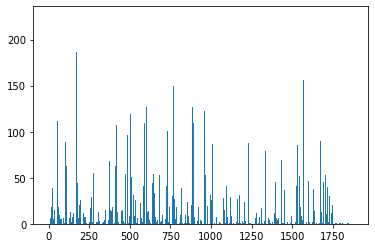

In [19]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [12]:
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# define dataset

In [13]:
#define Repeated K fold random search
def randomCV(X,y,range_l, range_h):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    grid = dict()
    grid['sel__k'] = [i for i in range(range_l, range_h+1)]
    search = RandomizedSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=100)
    results = search.fit(X, y)
    print('Best MAE: %.3f' % results.best_score_)
    print('Best Config: %s' % results.best_params_)
    
    # summarize all
    means = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']
    for mean, param in zip(means, params):
        print(">%.3f with: %r" % (mean, param))

    

In [22]:
randomCV(X,y, 2, 205)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -143572.995
Best Config: {'sel__k': 32}
>-729476.520 with: {'sel__k': 163}
>-165254.193 with: {'sel__k': 59}
>-143572.995 with: {'sel__k': 32}
>-216491.041 with: {'sel__k': 8}
>-172794.056 with: {'sel__k': 100}
>-265098.125 with: {'sel__k': 5}
>-605220.866 with: {'sel__k': 159}
>-465029.311 with: {'sel__k': 149}
>-164304.016 with: {'sel__k': 22}
>-306850.010 with: {'sel__k': 134}


In [14]:
#define Grid K fold random search
def gridCV(X,y,range_l, range_h):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    grid = dict()
    grid['sel__k'] = [i for i in range(range_l, range_h+1)]
    search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=100)
    results = search.fit(X, y)
    print('Best MAE: %.3f' % results.best_score_)
    print('Best Config: %s' % results.best_params_)
    
    # summarize all
    means = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']
    for mean, param in zip(means, params):
        print(">%.3f with: %r" % (mean, param))
    
    

In [32]:
gridCV(X,y,27, 37)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -145012.750
Best Config: {'sel__k': 32}
>-155948.291 with: {'sel__k': 27}
>-154466.797 with: {'sel__k': 28}
>-151253.111 with: {'sel__k': 29}
>-147405.984 with: {'sel__k': 30}
>-1115208.788 with: {'sel__k': 31}
>-145012.750 with: {'sel__k': 32}
>-196885.577 with: {'sel__k': 33}
>-260128.475 with: {'sel__k': 34}
>-252296.801 with: {'sel__k': 35}
>-246003.799 with: {'sel__k': 36}
>-239856.754 with: {'sel__k': 37}


KeyError: 'sel_k'

In [15]:
#selecting best terms
def select_best(fs, num_best):
    words = data.columns
    
    term_f = pd.DataFrame(list(zip(words, fs.scores_)), columns = ['term', 'f_score'])
    print(term_f.head())
    term_f = term_f.sort_values(by=['f_score'],ascending=False)
    print(term_f.head())
    
    top_t = term_f.iloc[:num_best]['term']
    return top_t
    

In [34]:
top_t = select_best(fs,32)

          term    f_score
0  coronavirus  26.717136
1        covid   7.826400
2           19   6.007357
3      covid19   2.945607
4       people   3.080463
                   term     f_score
1463  new covid19 cases  224.852401
1459        new covid19  202.974799
172                  je  186.962052
1334            last 24  178.769341
908    covid19 outbreak  170.945221


In [35]:
print(top_t)

1463    new covid19 cases
1459          new covid19
172                    je
1334              last 24
908      covid19 outbreak
1562         casos nuevos
367           confinement
1569            contagios
373                  nous
769        stay home stay
261                  vous
265                    qu
1377         active cases
626               il faut
1154                april
112                   pas
783          new covid 19
886             new covid
603          staying home
1171        wearing masks
960           front lines
734        covid 19 cases
504              19 cases
579               est pas
675                il est
1466               second
1687                spike
1153                  ppe
1578     ministerio salud
207                    ce
55                    est
1454             increase
Name: term, dtype: object


In [36]:
small_data = data[top_t]

In [98]:
small_data.to_csv('avr_Daily_hospital_occupancy.csv',index=False)

In [16]:
X= data.values
y = targets['Daily ICU occupancy'].values

In [17]:
fs = feature_imp(X,y)

Feature 0: 1.013309
Feature 1: 15.399115
Feature 2: 17.425742
Feature 3: 4.508125
Feature 4: 8.459027
Feature 5: 5.359521
Feature 6: 0.447875
Feature 7: 1.963375
Feature 8: 0.018960
Feature 9: 4.379538
Feature 10: 81.393205
Feature 11: 0.402210
Feature 12: 31.484582
Feature 13: 3.734916
Feature 14: 0.165872
Feature 15: 10.197630
Feature 16: 3.302493
Feature 17: 2.364066
Feature 18: 1.501417
Feature 19: 0.092677
Feature 20: 0.131052
Feature 21: 2.181893
Feature 22: 1.592016
Feature 23: 0.172959
Feature 24: 0.021669
Feature 25: 3.967240
Feature 26: 7.895166
Feature 27: 0.087418
Feature 28: 0.077863
Feature 29: 0.000398
Feature 30: 6.056443
Feature 31: 0.401884
Feature 32: 0.714480
Feature 33: 2.041703
Feature 34: 2.740128
Feature 35: 1.289145
Feature 36: 0.209532
Feature 37: 4.067067
Feature 38: 0.245339
Feature 39: 12.485650
Feature 40: 1.131475
Feature 41: 0.262999
Feature 42: 4.997473
Feature 43: 0.000811
Feature 44: 8.331805
Feature 45: 21.361140
Feature 46: 4.167035
Feature 47: 0.24

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


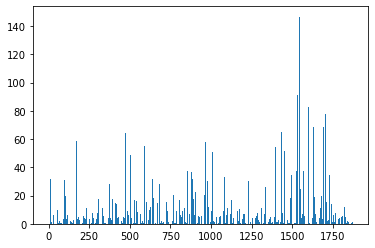

In [18]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [19]:
randomCV(X,y, 2, 205)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -9826.500
Best Config: {'sel__k': 74}
>-10396.044 with: {'sel__k': 76}
>-90930.447 with: {'sel__k': 177}
>-12522.107 with: {'sel__k': 108}
>-83409.275 with: {'sel__k': 204}
>-11192.999 with: {'sel__k': 32}
>-13514.421 with: {'sel__k': 21}
>-15436.788 with: {'sel__k': 124}
>-126111.615 with: {'sel__k': 172}
>-9826.500 with: {'sel__k': 74}
>-14292.110 with: {'sel__k': 121}


In [20]:
gridCV(X,y,69, 79)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -9458.550
Best Config: {'sel__k': 70}
>-9629.547 with: {'sel__k': 69}
>-9458.550 with: {'sel__k': 70}
>-9492.793 with: {'sel__k': 71}
>-9625.857 with: {'sel__k': 72}
>-10037.604 with: {'sel__k': 73}
>-10046.968 with: {'sel__k': 74}
>-9789.576 with: {'sel__k': 75}
>-10357.915 with: {'sel__k': 76}
>-10134.935 with: {'sel__k': 77}
>-10549.131 with: {'sel__k': 78}
>-10646.866 with: {'sel__k': 79}


In [21]:
top_t = select_best(fs,70)

          term    f_score
0  coronavirus   1.013309
1        covid  15.399115
2           19  17.425742
3      covid19   4.508125
4       people   8.459027
            term     f_score
1545   reopening  146.646469
1580        june  141.732951
1687       spike  133.049622
1426  post covid  113.861494
1161      normal  109.780933


In [22]:
print(top_t)

1545            reopening
1580                 june
1687                spike
1426           post covid
1161               normal
              ...        
814           da covid 19
590           casos covid
526     casos confirmados
1397      mortes covid 19
1351            com covid
Name: term, Length: 70, dtype: object


In [23]:
small_data2 = data[top_t]

In [24]:
small_data2.to_csv('avr_Daily_ICU_occupancy.csv',index=False)

In [25]:
X= data.values
y = targets['Weekly new ICU admissions'].values

In [26]:
fs = feature_imp(X,y)

Feature 0: 27.448879
Feature 1: 6.628046
Feature 2: 4.583499
Feature 3: 3.131133
Feature 4: 7.899081
Feature 5: 1.555936
Feature 6: 24.223936
Feature 7: 9.396162
Feature 8: 12.267873
Feature 9: 4.042352
Feature 10: 16.179285
Feature 11: 7.948434
Feature 12: 2.772828
Feature 13: 7.909003
Feature 14: 6.264985
Feature 15: 66.505635
Feature 16: 6.015291
Feature 17: 18.373501
Feature 18: 38.688415
Feature 19: 31.156858
Feature 20: 46.104637
Feature 21: 38.930570
Feature 22: 20.866972
Feature 23: 29.950997
Feature 24: 55.372067
Feature 25: 6.609456
Feature 26: 0.544480
Feature 27: 26.330883
Feature 28: 0.026217
Feature 29: 0.046668
Feature 30: 8.353775
Feature 31: 22.652398
Feature 32: 31.850697
Feature 33: 14.669775
Feature 34: 6.450558
Feature 35: 27.647713
Feature 36: 17.635313
Feature 37: 36.857426
Feature 38: 0.314874
Feature 39: 2.522575
Feature 40: 21.510400
Feature 41: 7.091142
Feature 42: 6.597935
Feature 43: 12.188429
Feature 44: 1.364249
Feature 45: 0.592332
Feature 46: 40.569064


C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


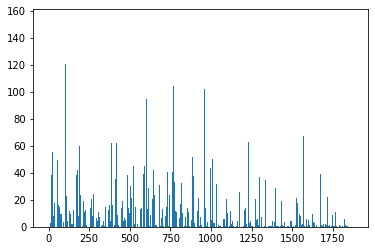

In [27]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [28]:
randomCV(X,y, 2, 205)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -49911.205
Best Config: {'sel__k': 68}
>-217850.494 with: {'sel__k': 157}
>-1069355.853 with: {'sel__k': 196}
>-290812.080 with: {'sel__k': 165}
>-50552.623 with: {'sel__k': 69}
>-54794.663 with: {'sel__k': 82}
>-49911.205 with: {'sel__k': 68}
>-2570979.251 with: {'sel__k': 195}
>-229300.004 with: {'sel__k': 158}
>-200931.670 with: {'sel__k': 151}
>-58384.925 with: {'sel__k': 86}


In [29]:
gridCV(X,y,63, 73)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -48062.172
Best Config: {'sel__k': 66}
>-50991.018 with: {'sel__k': 63}
>-48510.435 with: {'sel__k': 64}
>-50195.135 with: {'sel__k': 65}
>-48062.172 with: {'sel__k': 66}
>-49124.052 with: {'sel__k': 67}
>-49194.260 with: {'sel__k': 68}
>-48355.713 with: {'sel__k': 69}
>-48382.614 with: {'sel__k': 70}
>-51102.071 with: {'sel__k': 71}
>-50301.694 with: {'sel__k': 72}
>-49011.601 with: {'sel__k': 73}


In [30]:
top_t = select_best(fs,66)

          term    f_score
0  coronavirus  27.448879
1        covid   6.628046
2           19   4.583499
3      covid19   3.131133
4       people   7.899081
                       term     f_score
641      contre coronavirus  153.520382
559          doctors nurses  148.446370
1026            ventilators  134.545393
952   coronavirus covid2019  129.768472
104              stayathome  121.017438


In [31]:
print(top_t)

641        contre coronavirus
559            doctors nurses
1026              ventilators
952     coronavirus covid2019
104                stayathome
                ...          
496                 stay safe
507            du coronavirus
446                       nhs
533              petition via
783              new covid 19
Name: term, Length: 66, dtype: object


In [32]:
small_data3 = data[top_t]

In [33]:
small_data3.to_csv('avr_weekly_ICU_admissions.csv',index=False)

In [34]:
X= data.values
y = targets['Weekly new hospital admissions'].values

In [35]:
fs = feature_imp(X,y)

Feature 0: 1.014280
Feature 1: 30.577404
Feature 2: 29.679855
Feature 3: 3.559521
Feature 4: 2.341327
Feature 5: 4.209558
Feature 6: 2.808402
Feature 7: 0.481574
Feature 8: 0.293924
Feature 9: 3.071550
Feature 10: 111.409869
Feature 11: 0.002282
Feature 12: 39.845078
Feature 13: 0.959602
Feature 14: 0.669764
Feature 15: 38.591574
Feature 16: 1.523059
Feature 17: 0.087790
Feature 18: 1.975982
Feature 19: 2.968706
Feature 20: 6.134883
Feature 21: 27.174685
Feature 22: 0.085537
Feature 23: 3.974975
Feature 24: 9.215208
Feature 25: 1.673755
Feature 26: 8.318122
Feature 27: 1.681878
Feature 28: 0.023276
Feature 29: 0.027616
Feature 30: 1.033319
Feature 31: 3.564910
Feature 32: 1.660746
Feature 33: 0.215388
Feature 34: 1.013238
Feature 35: 0.615734
Feature 36: 0.550223
Feature 37: 13.410472
Feature 38: 0.123176
Feature 39: 6.682332
Feature 40: 0.286208
Feature 41: 0.010423
Feature 42: 1.619638
Feature 43: 0.487093
Feature 44: 6.372079
Feature 45: 10.959387
Feature 46: 12.612919
Feature 47: 0

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


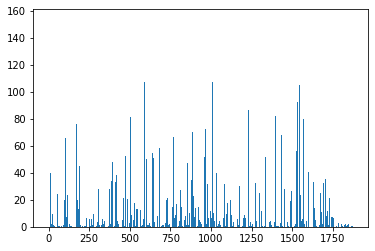

In [36]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [37]:
randomCV(X,y, 2, 205)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -473154.382
Best Config: {'sel__k': 75}
>-1122143.756 with: {'sel__k': 146}
>-6319101.749 with: {'sel__k': 176}
>-2012728.656 with: {'sel__k': 161}
>-576666.834 with: {'sel__k': 98}
>-549975.437 with: {'sel__k': 13}
>-485958.206 with: {'sel__k': 79}
>-4597544.641 with: {'sel__k': 205}
>-473154.382 with: {'sel__k': 75}
>-4986451.927 with: {'sel__k': 204}
>-582428.193 with: {'sel__k': 90}


In [38]:
gridCV(X,y,70, 80)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -463700.340
Best Config: {'sel__k': 71}
>-539749.742 with: {'sel__k': 70}
>-463700.340 with: {'sel__k': 71}
>-473492.444 with: {'sel__k': 72}
>-465272.726 with: {'sel__k': 73}
>-475155.374 with: {'sel__k': 74}
>-466926.390 with: {'sel__k': 75}
>-491442.555 with: {'sel__k': 76}
>-474346.455 with: {'sel__k': 77}
>-496866.077 with: {'sel__k': 78}
>-491292.237 with: {'sel__k': 79}
>-508713.361 with: {'sel__k': 80}


In [39]:
top_t = select_best(fs,71)

          term    f_score
0  coronavirus   1.014280
1        covid  30.577404
2           19  29.679855
3      covid19   3.559521
4       people   2.341327
             term     f_score
1459  new covid19  153.557729
64          casos  131.595517
1277       nuevos  131.233535
1426   post covid  127.027505
1324          mil  123.287967


In [40]:
print(top_t)

1459            new covid19
64                    casos
1277                 nuevos
1426             post covid
1324                    mil
               ...         
610               god bless
1171          wearing masks
1084    covid 19 infections
1580                   june
819        últimas 24 horas
Name: term, Length: 71, dtype: object


In [41]:
small_data4 = data[top_t]

In [42]:
small_data4.to_csv('avr_weekly_hosp_admissions.csv',index=False)

In [ ]:
#will conduct this for countries now

In [38]:
targets_USA = pd.read_csv('hosp_data_USA.csv')

In [40]:
dates =targets[['date']]

In [43]:
data_dates = pd.concat([dates, data], axis=1)

In [44]:
data_dates.head()

,date,coronavirus,covid,19,covid19,people,trump,via,us,virus,...,comfortable wear,melania,trumphascovid,flotus,diagnosis,trumpcovid,walter,reed,wh,19 diagnosis
0,2020-03-22,223843,67037,64625,56389,28026,17061,16803,15701,15674,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-23,245729,84031,81299,71684,29656,19862,19493,16947,15364,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-24,254575,91123,87927,84368,29052,23074,21522,18568,15762,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-25,253734,90652,88225,77901,27129,19520,21184,18257,14899,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-26,340182,128786,124076,137568,42561,28143,33227,33261,26839,...,0,0,0,0,0,0,0,0,0,0


In [58]:
usa_filter = targets_USA[['date', 'Daily ICU occupancy']].loc[targets_USA['Daily ICU occupancy']>= 0.0]

In [59]:
usa_dates = usa_filter[['date']]

In [60]:
#select correct date

data_usa = pd.merge(usa_dates, data_dates, on='date', how='inner') 
 


In [61]:
data_usa.head()

,date,coronavirus,covid,19,covid19,people,trump,via,us,virus,...,comfortable wear,melania,trumphascovid,flotus,diagnosis,trumpcovid,walter,reed,wh,19 diagnosis
0,2020-07-15,199219,211307,193624,160329,38576,39997,23258,27807,22573,...,0,0,0,0,0,0,0,0,0,0
1,2020-07-16,215003,227539,207379,172332,41485,42503,25673,30384,23454,...,0,0,0,0,0,0,0,0,0,0
2,2020-07-17,208217,217091,198150,159373,39465,32742,24575,27466,22123,...,0,0,0,0,0,0,0,0,0,0
3,2020-07-18,174944,163477,149659,118591,31819,29114,18683,19923,22273,...,0,0,0,0,0,0,0,0,0,0
4,2020-07-19,183233,165303,157923,113135,32561,39521,19405,20035,22472,...,0,0,0,0,0,0,0,0,0,0


In [62]:
data_usa.shape

(90, 1875)

In [63]:
data_usa = data_usa.drop(['date'], axis=1)

In [64]:
data_usa.shape

(90, 1874)

In [72]:
data_usa.to_csv('terms_USA_ICU.csv',index=False)

In [66]:
targets_Eng = pd.read_csv('hosp_data_Eng.csv')
print(targets_Eng.shape)
eng_filter = targets_Eng[['date', 'Daily ICU occupancy']].loc[targets_Eng['Daily ICU occupancy']>= 0.0]
eng_dates = eng_filter[['date']] 
data_eng =pd.merge(eng_dates, data_dates, on='date', how='inner') 
print(data_eng.shape)
print(data_eng.head())
data_eng = data_eng.drop(['date'], axis=1)
data_eng.shape

(205, 7)
(194, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-03-22       223843   67037   64625    56389   28026  17061  16803   
1  2020-03-23       245729   84031   81299    71684   29656  19862  19493   
2  2020-03-24       254575   91123   87927    84368   29052  23074  21522   
3  2020-03-25       253734   90652   88225    77901   27129  19520  21184   
4  2020-03-26       340182  128786  124076   137568   42561  28143  33227   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  15701  15674  ...                 0        0              0       0   
1  16947  15364  ...                 0        0              0       0   
2  18568  15762  ...                 0        0              0       0   
3  18257  14899  ...                 0        0              0       0   
4  33261  26839  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0

(194, 1874)

In [67]:
targets_Ger = pd.read_csv('hosp_data_Ger.csv')
print(targets_Ger.shape)
Ger_filter = targets_Ger[['date', 'Daily ICU occupancy']].loc[targets_Ger['Daily ICU occupancy']>= 0.0]
Ger_dates = Ger_filter[['date']] 
data_Ger =pd.merge(Ger_dates, data_dates, on='date', how='inner') 
print(data_Ger.shape)
print(data_Ger.head())
data_Ger = data_Ger.drop(['date'], axis=1)
data_Ger.shape


(205, 5)
(205, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-03-22       223843   67037   64625    56389   28026  17061  16803   
1  2020-03-23       245729   84031   81299    71684   29656  19862  19493   
2  2020-03-24       254575   91123   87927    84368   29052  23074  21522   
3  2020-03-25       253734   90652   88225    77901   27129  19520  21184   
4  2020-03-26       340182  128786  124076   137568   42561  28143  33227   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  15701  15674  ...                 0        0              0       0   
1  16947  15364  ...                 0        0              0       0   
2  18568  15762  ...                 0        0              0       0   
3  18257  14899  ...                 0        0              0       0   
4  33261  26839  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0

(205, 1874)

In [68]:
targets_Aus = pd.read_csv('hosp_data_Aus.csv')
print(targets_Aus.shape)
Aus_filter = targets_Aus[['date', 'Daily ICU occupancy']].loc[targets_Aus['Daily ICU occupancy']>= 0.0]
Aus_dates = Aus_filter[['date']] 
data_Aus =pd.merge(Aus_dates, data_dates, on='date', how='inner') 
print(data_Aus.shape)
print(data_Aus.head())
data_Aus = data_Aus.drop(['date'], axis=1)
data_Aus.shape



(196, 5)
(196, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-03-31       309257  146153  137606   171687   40739  34108  32515   
1  2020-04-01       329716  145358  138151   152555   41802  35107  34940   
2  2020-04-02       319227  146368  139986   148204   43442  31067  34812   
3  2020-04-03       325964  148479  143140   165227   42055  32004  36183   
4  2020-04-04       320148  146388  140901   151541   44957  35576  35740   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  29372  25056  ...                 0        0              0       0   
1  31192  24210  ...                 0        0              0       0   
2  30769  23899  ...                 0        0              0       0   
3  30319  24467  ...                 0        0              0       0   
4  29642  25643  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0

(196, 1874)

In [69]:
targets_SA = pd.read_csv('hosp_data_SA.csv')
print(targets_SA.shape)
SA_filter = targets_SA[['date', 'Daily ICU occupancy']].loc[targets_SA['Daily ICU occupancy']>= 0.0]
SA_dates = SA_filter[['date']] 
data_SA =pd.merge(SA_dates, data_dates, on='date', how='inner') 
print(data_SA.shape)
print(data_SA.head())
data_SA = data_SA.drop(['date'], axis=1)
data_SA.shape



(205, 7)
(205, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-03-22       223843   67037   64625    56389   28026  17061  16803   
1  2020-03-23       245729   84031   81299    71684   29656  19862  19493   
2  2020-03-24       254575   91123   87927    84368   29052  23074  21522   
3  2020-03-25       253734   90652   88225    77901   27129  19520  21184   
4  2020-03-26       340182  128786  124076   137568   42561  28143  33227   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  15701  15674  ...                 0        0              0       0   
1  16947  15364  ...                 0        0              0       0   
2  18568  15762  ...                 0        0              0       0   
3  18257  14899  ...                 0        0              0       0   
4  33261  26839  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0

(205, 1874)

In [70]:
targets_Isr = pd.read_csv('hosp_data_Isr.csv')
print(targets_Isr.shape)
Isr_filter = targets_Isr[['date', 'Daily ICU occupancy']].loc[targets_Isr['Daily ICU occupancy']>= 0.0]
Isr_dates = Isr_filter[['date']] 
data_Isr =pd.merge(Isr_dates, data_dates, on='date', how='inner') 
print(data_Isr.shape)
print(data_Isr.head())
data_Isr = data_Isr.drop(['date'], axis=1)
data_Isr.shape



(205, 9)
(42, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-03-22       223843   67037   64625    56389   28026  17061  16803   
1  2020-03-23       245729   84031   81299    71684   29656  19862  19493   
2  2020-03-24       254575   91123   87927    84368   29052  23074  21522   
3  2020-03-25       253734   90652   88225    77901   27129  19520  21184   
4  2020-03-26       340182  128786  124076   137568   42561  28143  33227   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  15701  15674  ...                 0        0              0       0   
1  16947  15364  ...                 0        0              0       0   
2  18568  15762  ...                 0        0              0       0   
3  18257  14899  ...                 0        0              0       0   
4  33261  26839  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0 

(42, 1874)

In [71]:
targets_Jap = pd.read_csv('hosp_data_Jap.csv')
print(targets_Jap.shape)
Jap_filter = targets_Jap[['date', 'Daily ICU occupancy']].loc[targets_Jap['Daily ICU occupancy']>= 0.0]
Jap_dates = Jap_filter[['date']] 
data_Jap =pd.merge(Jap_dates, data_dates, on='date', how='inner') 
print(data_Jap.shape)
print(data_Jap.head())
data_Jap = data_Jap.drop(['date'], axis=1)
data_Jap.shape



(24, 5)
(23, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-04-28       341032  225712  214042   243531   44706  37853  40394   
1  2020-05-07       356946  243692  230010   241105   54861  40921  41934   
2  2020-05-13       298171  226747  214502   190376   46232  28812  35998   
3  2020-05-21       317429  246092  233720   173395   44469  36123  38229   
4  2020-05-27       292435  253685  240133   199356   43147  27341  33280   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  38260  25452  ...                 0        0              0       0   
1  37275  27459  ...                 0        0              0       0   
2  31490  30598  ...                 0        0              0       0   
3  32516  24380  ...                 0        0              0       0   
4  32678  22550  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0  

(23, 1874)

In [84]:
targets_Chil = pd.read_csv('hosp_data_Chil.csv')
print(targets_Chil.shape)
Chil_filter = targets_Chil[['date', 'Daily ICU occupancy']].loc[targets_Chil['Daily ICU occupancy']>= 0.0]
Chil_dates = Chil_filter[['date']] 
data_Chil =pd.merge(Chil_dates, data_dates, on='date', how='inner') 
print(data_Chil.shape)
print(data_Chil.head())
data_Chil = data_Chil.drop(['date'], axis=1)
data_Chil.shape



(195, 7)
(195, 1875)
         date  coronavirus   covid      19  covid19  people  trump    via  \
0  2020-04-01       329716  145358  138151   152555   41802  35107  34940   
1  2020-04-02       319227  146368  139986   148204   43442  31067  34812   
2  2020-04-03       325964  148479  143140   165227   42055  32004  36183   
3  2020-04-04       320148  146388  140901   151541   44957  35576  35740   
4  2020-04-05       335131  147042  137684   144875   47112  35904  34284   

      us  virus  ...  comfortable wear  melania  trumphascovid  flotus  \
0  31192  24210  ...                 0        0              0       0   
1  30769  23899  ...                 0        0              0       0   
2  30319  24467  ...                 0        0              0       0   
3  29642  25643  ...                 0        0              0       0   
4  30193  26900  ...                 0        0              0       0   

   diagnosis  trumpcovid  walter  reed  wh  19 diagnosis  
0          0

(195, 1874)

In [ ]:
#first we will match the dates

In [73]:
data_eng.to_csv('terms_Eng_ICU.csv',index=False)

In [74]:
data_ger.to_csv('terms_Ger_ICU.csv',index=False)

In [75]:
data_Aus.to_csv('terms_Aus_ICU.csv',index=False)

In [76]:
data_SA.to_csv('terms_SA_ICU.csv',index=False)

In [93]:
X= data_usa.values
y = usa_filter['Daily ICU occupancy'].values

In [94]:
fs = feature_imp(X,y)

Feature 0: 38.948329
Feature 1: 8.040174
Feature 2: 11.906317
Feature 3: 6.430928
Feature 4: 2.968094
Feature 5: 5.866636
Feature 6: 29.520292
Feature 7: 15.662701
Feature 8: 2.820177
Feature 9: 5.187701
Feature 10: 34.659223
Feature 11: 2.535498
Feature 12: 27.411047
Feature 13: 2.135755
Feature 14: 0.007605
Feature 15: 2.110683
Feature 16: 5.234365
Feature 17: 67.404810
Feature 18: 25.948294
Feature 19: 50.336071
Feature 20: 22.588305
Feature 21: nan
Feature 22: 10.130447
Feature 23: 4.227250
Feature 24: 14.774801
Feature 25: 7.214313
Feature 26: 28.974419
Feature 27: 17.264808
Feature 28: 1.470034
Feature 29: 0.599618
Feature 30: 53.354593
Feature 31: 0.661668
Feature 32: 33.848296
Feature 33: 10.738539
Feature 34: 1.314245
Feature 35: 32.643368
Feature 36: 11.155029
Feature 37: 1.071058
Feature 38: 0.593451
Feature 39: 11.826760
Feature 40: 6.861185
Feature 41: 4.084295
Feature 42: 18.024937
Feature 43: 6.311443
Feature 44: 10.141690
Feature 45: 71.646026
Feature 46: 2.480315
Featu

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


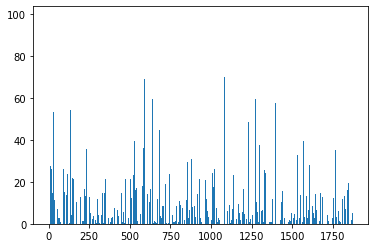

In [95]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [96]:
randomCV(X,y, 2, 90)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -1980950.632
Best Config: {'sel__k': 20}
>-2413543.226 with: {'sel__k': 50}
>-6032897847.161 with: {'sel__k': 80}
>-13280001.408 with: {'sel__k': 74}
>-1980950.632 with: {'sel__k': 20}
>-21788809.298 with: {'sel__k': 86}
>-2056534.615 with: {'sel__k': 49}
>-3088283.300 with: {'sel__k': 53}
>-2209037.908 with: {'sel__k': 44}
>-5108574.534 with: {'sel__k': 64}
>-2424120.335 with: {'sel__k': 39}


In [97]:
gridCV(X,y, 10, 25)

Fitting 30 folds for each of 16 candidates, totalling 480 fits
Best MAE: -1664849.542
Best Config: {'sel__k': 25}
>-1856702.253 with: {'sel__k': 10}
>-1852059.412 with: {'sel__k': 11}
>-1762418.777 with: {'sel__k': 12}
>-1824665.954 with: {'sel__k': 13}
>-1848787.096 with: {'sel__k': 14}
>-1950109.508 with: {'sel__k': 15}
>-2111211.055 with: {'sel__k': 16}
>-2079493.332 with: {'sel__k': 17}
>-2034435.588 with: {'sel__k': 18}
>-2026431.710 with: {'sel__k': 19}
>-2030199.172 with: {'sel__k': 20}
>-1920161.089 with: {'sel__k': 21}
>-1940996.793 with: {'sel__k': 22}
>-1839134.782 with: {'sel__k': 23}
>-1698150.854 with: {'sel__k': 24}
>-1664849.542 with: {'sel__k': 25}


In [99]:
top_t = select_best(fs,25)

          term    f_score
0  coronavirus  38.948329
1        covid   8.040174
2           19  11.906317
3      covid19   6.430928
4       people   2.968094
                           term    f_score
1425            pacientes covid  98.934839
1523        new cases confirmed  90.357101
747   amid coronavirus pandemic  88.042193
482            amid coronavirus  81.800102
1629                back school  80.406278


In [100]:
print(top_t)

1425              pacientes covid
1523          new cases confirmed
747     amid coronavirus pandemic
482              amid coronavirus
1629                  back school
721                  total number
1010               covid19 corona
234                          país
471          coronavirus pandemic
148                            de
64                          casos
142                         gente
45                             da
1358                    pacientes
1083                covid 19 país
590                   casos covid
555                  nuevos casos
109                         total
501             casos coronavirus
17                             si
762      coronavirus live updates
260                           así
128                            sa
757                casos covid 19
814                   da covid 19
Name: term, dtype: object


In [101]:
small_usa = data_usa[top_t]

In [102]:
small_usa.to_csv('small_usa_data.csv',index=False)

In [103]:
X= data_eng.values
y = eng_filter['Daily ICU occupancy'].values

In [104]:
fs = feature_imp(X,y)

Feature 0: 166.426209
Feature 1: 6.856371
Feature 2: 3.278335
Feature 3: 14.369712
Feature 4: 37.454545
Feature 5: 12.950626
Feature 6: 110.813847
Feature 7: 41.581117
Feature 8: 60.171086
Feature 9: 14.888204
Feature 10: 24.458155
Feature 11: 32.058816
Feature 12: 0.278551
Feature 13: 42.598446
Feature 14: 26.728968
Feature 15: 114.262758
Feature 16: 31.094698
Feature 17: 120.467060
Feature 18: 149.985709
Feature 19: 193.731825
Feature 20: 147.638139
Feature 21: 98.982805
Feature 22: 79.848154
Feature 23: 177.570738
Feature 24: 370.513922
Feature 25: 41.787392
Feature 26: 5.331781
Feature 27: 92.195023
Feature 28: 1.812380
Feature 29: 7.141623
Feature 30: 32.098578
Feature 31: 97.201693
Feature 32: 139.500941
Feature 33: 70.621675
Feature 34: 37.206570
Feature 35: 122.266204
Feature 36: 62.710453
Feature 37: 193.983381
Feature 38: 0.804409
Feature 39: 24.648159
Feature 40: 83.743080
Feature 41: 54.842260
Feature 42: 59.777034
Feature 43: 74.647761
Feature 44: 3.848499
Feature 45: 10.9

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


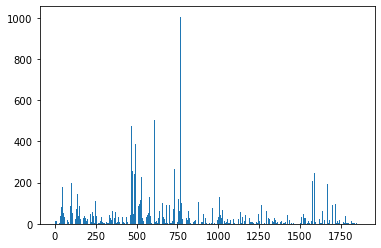

In [105]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [107]:
randomCV(X,y, 2, 194)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -119322.469
Best Config: {'sel__k': 11}
>-564465.530 with: {'sel__k': 76}
>-2955857.767 with: {'sel__k': 113}
>-18838565.888 with: {'sel__k': 166}
>-865056.058 with: {'sel__k': 48}
>-6782012.367 with: {'sel__k': 141}
>-119322.469 with: {'sel__k': 11}
>-14857730.716 with: {'sel__k': 172}
>-859257.571 with: {'sel__k': 66}
>-1194435.425 with: {'sel__k': 105}
>-2118930.432 with: {'sel__k': 129}


In [108]:
gridCV(X,y, 6, 16)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -81216.057
Best Config: {'sel__k': 16}
>-204929.537 with: {'sel__k': 6}
>-176440.256 with: {'sel__k': 7}
>-164827.021 with: {'sel__k': 8}
>-165014.835 with: {'sel__k': 9}
>-148266.312 with: {'sel__k': 10}
>-123094.768 with: {'sel__k': 11}
>-115104.080 with: {'sel__k': 12}
>-100691.672 with: {'sel__k': 13}
>-104670.375 with: {'sel__k': 14}
>-88049.094 with: {'sel__k': 15}
>-81216.057 with: {'sel__k': 16}


In [109]:
top_t = select_best(fs,16)

          term     f_score
0  coronavirus  166.426209
1        covid    6.856371
2           19    3.278335
3      covid19   14.369712
4       people   37.454545
                term      f_score
769   stay home stay  1005.955542
1377    active cases   682.063273
367      confinement   508.694615
610        god bless   502.996032
603     staying home   481.619231


In [110]:
print(top_t)

769        stay home stay
1377         active cases
367           confinement
610             god bless
603          staying home
469             stay home
1562         casos nuevos
65                  fight
373                  nous
559        doctors nurses
480     fight coronavirus
493       coronavirus via
558       coronavirus vía
600        coronavirus il
24                   stay
908      covid19 outbreak
Name: term, dtype: object


In [111]:
small_eng = data_eng[top_t]

In [112]:
small_eng.to_csv('small_eng_data.csv',index=False)

In [116]:
X= data_ger.values
y = Ger_filter['Daily ICU occupancy'].values

In [117]:
fs = feature_imp(X,y)

Feature 0: 283.434551
Feature 1: 2.923206
Feature 2: 6.211695
Feature 3: 80.588437
Feature 4: 83.094012
Feature 5: 0.885478
Feature 6: 313.845072
Feature 7: 115.914015
Feature 8: 93.469172
Feature 9: 70.027540
Feature 10: 3.484162
Feature 11: 47.427697
Feature 12: 11.174580
Feature 13: 77.283223
Feature 14: 36.397539
Feature 15: 61.497594
Feature 16: 70.498178
Feature 17: 198.894549
Feature 18: 132.653985
Feature 19: 278.645487
Feature 20: 217.006140
Feature 21: 18.950481
Feature 22: 166.484222
Feature 23: 356.170501
Feature 24: 200.591624
Feature 25: 124.262115
Feature 26: 45.311433
Feature 27: 143.156140
Feature 28: 2.925768
Feature 29: 2.433927
Feature 30: 49.858143
Feature 31: 365.415933
Feature 32: 223.416600
Feature 33: 171.213922
Feature 34: 92.233445
Feature 35: 265.581830
Feature 36: 65.630664
Feature 37: 628.250998
Feature 38: 1.921240
Feature 39: 64.233307
Feature 40: 122.251574
Feature 41: 92.076087
Feature 42: 147.016560
Feature 43: 155.501804
Feature 44: 31.203540
Feature

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


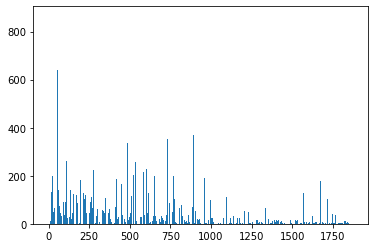

In [118]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [120]:
randomCV(X,y, 2, 195)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -52236.110
Best Config: {'sel__k': 109}
>-80673.392 with: {'sel__k': 30}
>-76322.944 with: {'sel__k': 60}
>-466557.115 with: {'sel__k': 163}
>-60544.667 with: {'sel__k': 84}
>-80680.591 with: {'sel__k': 23}
>-64936.491 with: {'sel__k': 85}
>-52236.110 with: {'sel__k': 109}
>-74503.636 with: {'sel__k': 58}
>-952961.743 with: {'sel__k': 156}
>-61585.081 with: {'sel__k': 91}


In [121]:
gridCV(X,y, 104, 114)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -49108.679
Best Config: {'sel__k': 109}
>-51456.422 with: {'sel__k': 104}
>-52609.912 with: {'sel__k': 105}
>-53316.926 with: {'sel__k': 106}
>-54085.222 with: {'sel__k': 107}
>-52471.032 with: {'sel__k': 108}
>-49108.679 with: {'sel__k': 109}
>-54543.019 with: {'sel__k': 110}
>-53776.837 with: {'sel__k': 111}
>-66230.079 with: {'sel__k': 112}
>-80152.022 with: {'sel__k': 113}
>-52400.682 with: {'sel__k': 114}


In [122]:
top_t = select_best(fs,109)
print(top_t)

          term     f_score
0  coronavirus  283.434551
1        covid    2.923206
2           19    6.211695
3      covid19   80.588437
4       people   83.094012
    term     f_score
97  pour  862.003001
66   des  825.948203
78    du  674.348129
55   est  641.525000
46    et  634.069318
97                              pour
66                               des
78                                du
55                               est
46                                et
                    ...             
1635    death population coronavirus
33                             world
290                            money
1670                nuevos contagios
22                              time
Name: term, Length: 109, dtype: object


In [123]:
small_ger = data_ger[top_t]

In [124]:
small_ger.to_csv('small_ger_data.csv',index=False)

In [125]:


X= data_Aus.values
y = Aus_filter['Daily ICU occupancy'].values


In [126]:
fs = feature_imp(X,y)

Feature 0: 15.039610
Feature 1: 6.456233
Feature 2: 4.359568
Feature 3: 1.873396
Feature 4: 0.332241
Feature 5: 0.765432
Feature 6: 22.639529
Feature 7: 5.083365
Feature 8: 5.485508
Feature 9: 1.710678
Feature 10: 22.149231
Feature 11: 3.117605
Feature 12: 3.579790
Feature 13: 1.238783
Feature 14: 11.111332
Feature 15: 68.731063
Feature 16: 2.025235
Feature 17: 16.281850
Feature 18: 21.780490
Feature 19: 19.183887
Feature 20: 32.559872
Feature 21: 47.878927
Feature 22: 10.594469
Feature 23: 19.768712
Feature 24: 24.141270
Feature 25: 4.492727
Feature 26: 2.474976
Feature 27: 17.305104
Feature 28: 3.364865
Feature 29: 3.971115
Feature 30: 6.218330
Feature 31: 9.842117
Feature 32: 14.473783
Feature 33: 9.398865
Feature 34: 1.959145
Feature 35: 16.319551
Feature 36: 10.857250
Feature 37: 26.363874
Feature 38: 0.446515
Feature 39: 0.472570
Feature 40: 10.605725
Feature 41: 3.539573
Feature 42: 5.489926
Feature 43: 13.112842
Feature 44: 1.177165
Feature 45: 0.038487
Feature 46: 27.904222
Fe

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


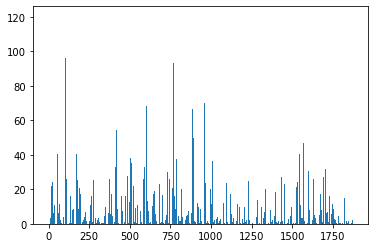

In [127]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [128]:
randomCV(X,y, 2, 196)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -124.837
Best Config: {'sel__k': 86}
>-154.728 with: {'sel__k': 43}
>-183.971 with: {'sel__k': 122}
>-179.428 with: {'sel__k': 99}
>-1158.415 with: {'sel__k': 195}
>-423.472 with: {'sel__k': 3}
>-343.257 with: {'sel__k': 6}
>-124.837 with: {'sel__k': 86}
>-132.396 with: {'sel__k': 48}
>-155.825 with: {'sel__k': 90}
>-251.297 with: {'sel__k': 128}


In [129]:
gridCV(X,y, 81, 91)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -122.221
Best Config: {'sel__k': 83}
>-145.340 with: {'sel__k': 81}
>-135.833 with: {'sel__k': 82}
>-122.221 with: {'sel__k': 83}
>-157.461 with: {'sel__k': 84}
>-240.715 with: {'sel__k': 85}
>-385.959 with: {'sel__k': 86}
>-162.898 with: {'sel__k': 87}
>-184.383 with: {'sel__k': 88}
>-161.887 with: {'sel__k': 89}
>-127.984 with: {'sel__k': 90}
>-208.919 with: {'sel__k': 91}


In [130]:
top_t = select_best(fs,83)
print(top_t)

small_aus = data_Aus[top_t]
small_aus.to_csv('small_aus_data.csv',index=False)


          term    f_score
0  coronavirus  15.039610
1        covid   6.456233
2           19   4.359568
3      covid19   1.873396
4       people   0.332241
                term     f_score
367      confinement  119.975104
104       stayathome   96.146229
1459     new covid19   95.031404
1224      april 2020   94.167168
769   stay home stay   93.312832
367           confinement
104            stayathome
1459          new covid19
1224           april 2020
769        stay home stay
              ...        
1545            reopening
659        health workers
1054    stayhome staysafe
1562         casos nuevos
1687                spike
Name: term, Length: 83, dtype: object


In [131]:


X= data_Chil.values
y = Chil_filter['Daily ICU occupancy'].values


In [132]:
fs = feature_imp(X,y)

Feature 0: 16.162446
Feature 1: 6.817083
Feature 2: 4.841451
Feature 3: 2.026010
Feature 4: 0.540341
Feature 5: 3.086837
Feature 6: 26.132878
Feature 7: 2.177878
Feature 8: 2.969884
Feature 9: 1.921138
Feature 10: 172.282793
Feature 11: 0.048570
Feature 12: 10.881662
Feature 13: 0.892405
Feature 14: 18.139068
Feature 15: 30.181569
Feature 16: 0.330787
Feature 17: 13.282249
Feature 18: 4.546054
Feature 19: 22.381256
Feature 20: 20.232661
Feature 21: 34.668098
Feature 22: 7.152408
Feature 23: 30.217984
Feature 24: 22.605608
Feature 25: 4.109006
Feature 26: 0.120704
Feature 27: 7.939032
Feature 28: 0.897969
Feature 29: 4.311056
Feature 30: 0.127727
Feature 31: 62.299242
Feature 32: 17.515797
Feature 33: 5.570879
Feature 34: 3.060473
Feature 35: 19.374459
Feature 36: 0.022978
Feature 37: 116.683839
Feature 38: 0.106401
Feature 39: 0.001091
Feature 40: 3.772995
Feature 41: 4.988474
Feature 42: 6.124632
Feature 43: 10.824130
Feature 44: 0.132077
Feature 45: 0.005642
Feature 46: 104.224735
Fe

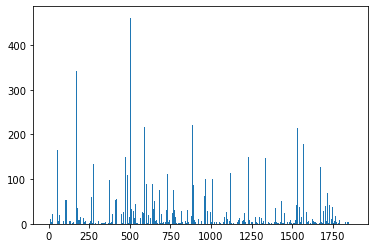

In [133]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [135]:
randomCV(X,y, 2, 205)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -26368.687
Best Config: {'sel__k': 44}
>-147398.576 with: {'sel__k': 158}
>-59270.651 with: {'sel__k': 6}
>-306545.835 with: {'sel__k': 189}
>-1262204.977 with: {'sel__k': 172}
>-26368.687 with: {'sel__k': 44}
>-28515.301 with: {'sel__k': 50}
>-29166.962 with: {'sel__k': 83}
>-560485.117 with: {'sel__k': 184}
>-27989.752 with: {'sel__k': 74}
>-42398.680 with: {'sel__k': 114}


In [136]:
gridCV(X,y, 39, 49)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -25668.881
Best Config: {'sel__k': 39}
>-25668.881 with: {'sel__k': 39}
>-26370.691 with: {'sel__k': 40}
>-26512.300 with: {'sel__k': 41}
>-26967.941 with: {'sel__k': 42}
>-25775.868 with: {'sel__k': 43}
>-27098.091 with: {'sel__k': 44}
>-26529.064 with: {'sel__k': 45}
>-26632.408 with: {'sel__k': 46}
>-27914.607 with: {'sel__k': 47}
>-27578.726 with: {'sel__k': 48}
>-27093.094 with: {'sel__k': 49}


In [137]:
top_t = select_best(fs,39)
print(top_t)

small_chil = data_Chil[top_t]
small_chil.to_csv('small_chil_data.csv',index=False)


          term    f_score
0  coronavirus  16.162446
1        covid   6.817083
2           19   4.841451
3      covid19   2.026010
4       people   0.540341
                   term     f_score
734      covid 19 cases  463.300826
504            19 cases  460.136137
1171      wearing masks  401.779261
1463  new covid19 cases  379.639497
172                  je  342.324119
734                                        covid 19 cases
504                                              19 cases
1171                                        wearing masks
1463                                    new covid19 cases
172                                                    je
1459                                          new covid19
1562                                         casos nuevos
186                                                   qui
207                                                    ce
1228                                           wear masks
163                                             

In [138]:


X= data_SA.values
y = SA_filter['Daily ICU occupancy'].values


In [139]:
fs = feature_imp(X,y)

Feature 0: 69.830768
Feature 1: 0.159496
Feature 2: 1.097189
Feature 3: 23.844135
Feature 4: 34.641253
Feature 5: 0.987910
Feature 6: 38.874071
Feature 7: 26.050172
Feature 8: 17.879273
Feature 9: 18.818797
Feature 10: 1.504978
Feature 11: 10.502858
Feature 12: 4.841005
Feature 13: 26.352599
Feature 14: 21.524945
Feature 15: 20.951680
Feature 16: 20.219415
Feature 17: 57.440780
Feature 18: 43.140928
Feature 19: 61.284435
Feature 20: 42.198049
Feature 21: 24.956380
Feature 22: 46.293112
Feature 23: 68.316112
Feature 24: 84.212869
Feature 25: 33.963961
Feature 26: 10.697860
Feature 27: 28.269012
Feature 28: 1.167457
Feature 29: 0.966746
Feature 30: 14.462217
Feature 31: 81.093270
Feature 32: 58.115533
Feature 33: 43.835928
Feature 34: 28.209444
Feature 35: 69.317483
Feature 36: 15.937583
Feature 37: 85.245569
Feature 38: 0.400297
Feature 39: 26.383271
Feature 40: 34.304019
Feature 41: 25.438871
Feature 42: 51.460178
Feature 43: 46.740706
Feature 44: 9.760847
Feature 45: 30.103249
Feature

C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


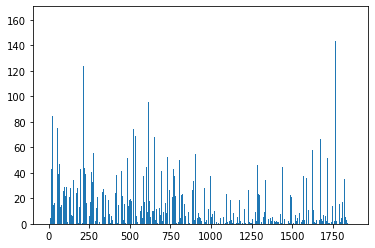

In [140]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [141]:
randomCV(X,y, 2, 205)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Best MAE: -226252.030
Best Config: {'sel__k': 45}
>-566184.120 with: {'sel__k': 86}
>-427426.466 with: {'sel__k': 131}
>-266025.324 with: {'sel__k': 66}
>-552876.551 with: {'sel__k': 89}
>-243041.216 with: {'sel__k': 43}
>-287395.161 with: {'sel__k': 82}
>-282412.439 with: {'sel__k': 4}
>-226252.030 with: {'sel__k': 45}
>-2703488.852 with: {'sel__k': 163}
>-4629573.444 with: {'sel__k': 203}


In [142]:
gridCV(X,y, 40, 50)

Fitting 30 folds for each of 11 candidates, totalling 330 fits
Best MAE: -229794.468
Best Config: {'sel__k': 49}
>-246691.375 with: {'sel__k': 40}
>-231509.932 with: {'sel__k': 41}
>-250460.062 with: {'sel__k': 42}
>-237172.221 with: {'sel__k': 43}
>-247808.713 with: {'sel__k': 44}
>-242498.755 with: {'sel__k': 45}
>-239628.054 with: {'sel__k': 46}
>-241834.146 with: {'sel__k': 47}
>-237499.101 with: {'sel__k': 48}
>-229794.468 with: {'sel__k': 49}
>-263053.657 with: {'sel__k': 50}


In [143]:
top_t = select_best(fs,49)
print(top_t)

small_sa = data_SA[top_t]
small_sa.to_csv('small_sa_data.csv',index=False)


          term    f_score
0  coronavirus  69.830768
1        covid   0.159496
2           19   1.097189
3      covid19  23.844135
4       people  34.641253
                     term     f_score
1767  mitega india mitega  162.316894
1766   india mitega india  143.606199
215           coronavírus  123.570335
1775         india mitega  118.610576
850                school  111.976964
1767                             mitega india mitega
1766                              india mitega india
215                                      coronavírus
1775                                    india mitega
850                                           school
1629                                     back school
1619                                         schools
1523                             new cases confirmed
463                                             kids
550                                   il coronavirus
615                                        well done
1670                             

In [ ]:
searchGCV = GridSearchCV(pipeline, grid2, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=10)

In [16]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [19]:
model = LinearRegression()

In [20]:
fs = SelectKBest(score_func=mutual_info_regression)

In [21]:
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

In [22]:
grid = dict()
grid['sel__k'] = [i for i in range(50, 205)]

In [23]:
search = RandomizedSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=100)

In [24]:
results = search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [25]:
print('Best MAE: %.3f' % results.best_score_)


Best MAE: -159171.621


In [26]:
print('Best Config: %s' % results.best_params_)

Best Config: {'sel__k': 83}


In [27]:

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-166669.579 with: {'sel__k': 55}
>-195419.418 with: {'sel__k': 110}
>-3621086.739 with: {'sel__k': 197}
>-169877.024 with: {'sel__k': 97}
>-2035413.593 with: {'sel__k': 177}
>-159171.621 with: {'sel__k': 83}
>-159807.155 with: {'sel__k': 92}
>-169933.868 with: {'sel__k': 57}
>-47149510.236 with: {'sel__k': 187}
>-29984148.667 with: {'sel__k': 186}


In [28]:
grid2 = dict()
grid2['sel__k'] = [i for i in range(65, 95)]

In [29]:
searchGCV = GridSearchCV(pipeline, grid2, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=10)

In [30]:
resultsGCV = searchGCV.fit(X, y)

Fitting 30 folds for each of 30 candidates, totalling 900 fits


In [31]:
print('Best MAE: %.3f' % resultsGCV.best_score_)


Best MAE: -147620.226


In [32]:
print('Best Config: %s' % resultsGCV.best_params_)

Best Config: {'sel__k': 74}


In [33]:
# summarize all
means = resultsGCV.cv_results_['mean_test_score']
params = resultsGCV.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-171375.142 with: {'sel__k': 65}
>-153017.919 with: {'sel__k': 66}
>-164234.729 with: {'sel__k': 67}
>-165926.709 with: {'sel__k': 68}
>-162331.972 with: {'sel__k': 69}
>-163658.937 with: {'sel__k': 70}
>-167923.011 with: {'sel__k': 71}
>-148219.356 with: {'sel__k': 72}
>-155768.855 with: {'sel__k': 73}
>-147620.226 with: {'sel__k': 74}
>-148669.189 with: {'sel__k': 75}
>-148698.289 with: {'sel__k': 76}
>-154393.537 with: {'sel__k': 77}
>-158235.743 with: {'sel__k': 78}
>-156509.098 with: {'sel__k': 79}
>-154132.780 with: {'sel__k': 80}
>-160676.637 with: {'sel__k': 81}
>-158778.979 with: {'sel__k': 82}
>-161414.234 with: {'sel__k': 83}
>-166594.671 with: {'sel__k': 84}
>-168224.148 with: {'sel__k': 85}
>-159537.995 with: {'sel__k': 86}
>-164798.527 with: {'sel__k': 87}
>-166314.288 with: {'sel__k': 88}
>-160821.654 with: {'sel__k': 89}
>-168533.248 with: {'sel__k': 90}
>-162284.833 with: {'sel__k': 91}
>-170386.739 with: {'sel__k': 92}
>-169536.155 with: {'sel__k': 93}
>-172381.588 w

In [ ]:
#Now, I will try to select the best 74 features

In [35]:
gridSmall = dict()
gridSmall['sel__k'] = [i for i in range(10, 30)]

In [36]:
searchSmall = GridSearchCV(pipeline, gridSmall, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=10)

In [37]:
resultsSmall = searchSmall.fit(X, y)

Fitting 30 folds for each of 20 candidates, totalling 600 fits


In [38]:
print('Best MAE: %.3f' % resultsSmall.best_score_)

Best MAE: -147865.239


In [39]:
print('Best Config: %s' % resultsSmall.best_params_)

Best Config: {'sel__k': 29}


In [40]:
# summarize all
means = resultsSmall.cv_results_['mean_test_score']
params = resultsSmall.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-209475.748 with: {'sel__k': 10}
>-207354.147 with: {'sel__k': 11}
>-201335.166 with: {'sel__k': 12}
>-197838.427 with: {'sel__k': 13}
>-191892.989 with: {'sel__k': 14}
>-193009.142 with: {'sel__k': 15}
>-184311.806 with: {'sel__k': 16}
>-181571.815 with: {'sel__k': 17}
>-175275.761 with: {'sel__k': 18}
>-173057.441 with: {'sel__k': 19}
>-171684.085 with: {'sel__k': 20}
>-169246.987 with: {'sel__k': 21}
>-160038.723 with: {'sel__k': 22}
>-159390.401 with: {'sel__k': 23}
>-155781.538 with: {'sel__k': 24}
>-159032.028 with: {'sel__k': 25}
>-157987.291 with: {'sel__k': 26}
>-154333.418 with: {'sel__k': 27}
>-154167.836 with: {'sel__k': 28}
>-147865.239 with: {'sel__k': 29}


In [43]:
from sklearn.feature_selection import f_regression

In [46]:
def select_features_Choose(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=29)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
# feature selection
X_train_fs, X_test_fs, fs = select_features_Choose(X_train, y_train, X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 354.379


C:\Users\annac\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [50]:
gridSmall2 = dict()
gridSmall2['sel__k'] = [i for i in range(2, 10)]

In [51]:
searchSm = GridSearchCV(pipeline, gridSmall2, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=10)

In [52]:
resultsSm = searchSm.fit(X, y)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


In [53]:
# summarize all
means = resultsSm.cv_results_['mean_test_score']
params = resultsSm.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-447836.547 with: {'sel__k': 2}
>-359033.962 with: {'sel__k': 3}
>-299780.984 with: {'sel__k': 4}
>-269916.917 with: {'sel__k': 5}
>-242328.264 with: {'sel__k': 6}
>-222328.599 with: {'sel__k': 7}
>-218292.577 with: {'sel__k': 8}
>-209342.926 with: {'sel__k': 9}


In [54]:
sort_f = fs.scores_

In [59]:
words = data.columns

In [71]:
term_f = pd.DataFrame(list(zip(words, fs.scores_)), columns = ['term', 'f_score'])

In [72]:
term_f.head()

,term,f_score
0,coronavirus,26.717136
1,covid,7.826400
2,19,6.007357
3,covid19,2.945607
4,people,3.080463


In [73]:
term_f = term_f.sort_values(by=['f_score'],ascending=False)

In [75]:
term_f.head(29)

,term,f_score
1463,new covid19 cases,224.852401
1459,new covid19,202.974799
172,je,186.962052
1334,last 24,178.769341
908,covid19 outbreak,170.945221
1562,casos nuevos,160.687843
367,confinement,157.634691
1569,contagios,156.044522
373,nous,151.990547
769,stay home stay,149.634981


In [77]:
top_t = term_f.iloc[:29]['term']

In [78]:
print(top_t)

1463    new covid19 cases
1459          new covid19
172                    je
1334              last 24
908      covid19 outbreak
1562         casos nuevos
367           confinement
1569            contagios
373                  nous
769        stay home stay
261                  vous
265                    qu
1377         active cases
626               il faut
1154                april
112                   pas
783          new covid 19
886             new covid
603          staying home
1171        wearing masks
960           front lines
734        covid 19 cases
504              19 cases
579               est pas
675                il est
1466               second
1687                spike
1153                  ppe
1578     ministerio salud
Name: term, dtype: object


In [79]:
small_data = data[top_t]

In [81]:
small_data.head(50)

,new covid19 cases,new covid19,je,last 24,covid19 outbreak,casos nuevos,confinement,contagios,nous,stay home stay,...,wearing masks,front lines,covid 19 cases,19 cases,est pas,il est,second,spike,ppe,ministerio salud
0,0,0,3375,0,0,0,1986,0,1964,355,...,0,0,1336,1351,578,348,0,0,0,0
1,0,0,3460,0,296,0,2260,0,2066,427,...,0,0,1583,1594,607,384,0,0,0,0
2,0,0,3483,0,325,0,2116,0,2006,536,...,0,324,1717,1728,619,434,0,0,0,0
3,0,0,3265,0,443,0,1908,0,2057,433,...,0,356,1771,1788,566,409,0,0,0,0
4,0,0,4158,0,699,0,2691,0,2917,628,...,0,671,3056,3077,822,544,0,0,0,0
5,0,0,4426,0,712,0,3407,0,2929,570,...,0,670,3046,3065,807,627,0,0,0,0
6,0,0,4608,0,497,0,3550,0,3060,568,...,0,537,2675,2696,898,601,0,0,0,0
7,0,0,4527,0,557,0,3248,0,2816,435,...,392,516,2395,2418,858,596,0,0,3739,0
8,0,0,4111,0,661,0,3347,0,2875,608,...,0,954,2641,2659,800,513,0,0,2817,0
9,0,0,4353,0,661,0,2827,0,3159,464,...,0,692,2577,2593,848,615,0,0,3115,0


In [76]:
term_f.to_csv('term_f.csv',index=False)

In [ ]:
#now I will repeat the process for countries

In [ ]:
#USA

In [5]:
targets_USA = pd.read_csv('hosp_data_USA.csv')

In [6]:
targets_USA.shape

(90, 7)